### Import modules

In [6]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [7]:
# Define study
STUDY_NAME = "xing_scan_flatvh_75_180_1500_higher_chroma_neg_oct"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_1811/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  crossing_angle qx     qy                          
lhcb1 120.0          62.305 60.310      base_collider   
                     62.306 60.311      base_collider   
                     62.307 60.312      base_collider   
                     62.308 60.313      base_collider   
                     62.309 60.314      base_collider   
...                                               ...   
      270.0          62.325 60.330      base_collider   
                     62.326 60.331      base_collider   
                     62.327 60.332      base_collider   
                     62.328 60.333      base_collider   
                     62.329 60.334      base_collider   

                                    normalized amplitude in xy-plane      qx  \
beam  crossing_angle qx     qy                                                 
lhcb1 120.0          62.305 60.310                             2.000  62.305   
                     62.306 60.311                             2.000  62.306   
                     62.307 60.312                             2.000  62.307   
                     62.308 60.313                             2.000  62.308   
                     62.309 60.314                             2.000  62.309   
...                                                              ...     ...   
      270.0          62.325 60.330                             3.310  62.325   
                     62.326 60.331                             2.414  62.326   
                     62.327 60.332                             2.000  62.327   
                     62.328 60.333                             2.000  62.328   
                     62.329 60.334                             2.000  62.329   

                                        qy   dqx   dqy  i_bunch_b1  \
beam  crossing_angle qx     qy                                       
lhcb1 120.0          62.305 60.310  60.310  15.0  15.0         NaN   
                     62.306 60.311  60.311  15.0  15.0         NaN   
                     62.307 60.312  60.312  15.0  15.0         NaN   
                     62.308 60.313  60.313  15.0  15.0         NaN   
                     62.309 60.314  60.314  15.0  15.0         NaN   
...                                    ...   ...   ...         ...   
      270.0          62.325 60.330  60.330  15.0  15.0         NaN   
                     62.326 60.331  60.331  15.0  15.0         NaN   
                     62.327 60.332  60.332  15.0  15.0         NaN   
                     62.328 60.333  60.333  15.0  15.0         NaN   
                     62.329 60.334  60.334  15.0  15.0         NaN   

                                    i_bunch_b2  i_oct_b1  i_oct_b2  \
beam  crossing_angle qx     qy                                       
lhcb1 120.0          62.305 60.310         NaN     -60.0     -60.0   
                     62.306 60.311         NaN     -60.0     -60.0   
                     62.307 60.312         NaN     -60.0     -60.0   
                     62.308 60.313         NaN     -60.0     -60.0   
                     62.309 60.314         NaN     -60.0     -60.0   
...                                        ...       ...       ...   
      270.0          62.325 60.330         NaN     -60.0     -60.0   
                     62.326 60.331         NaN     -60.0     -60.0   
                     62.327 60.332         NaN     -60.0     -60.0   
                     62.328 60.333         NaN     -60.0     -60.0   
                     62.329 60.334         NaN     -60.0     -60.0   

                                    num_particles_per_bunch  crossing_angle  
beam  crossing_angle qx     qy                                               
lhcb1 120.0          62.305 60.310             1.400000e+11           120.0  
                     62.306 60.311             1.400000e+11           120.0  
                     62.307 60.312             1.400000e+11           120.0  
                     62.308 60.313      

In [8]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
qx,,,,,,,,,,,,,,,,
62.305,2.000,2.000,2.000,2.000,2.897,3.517,3.586,3.793,3.586,4.069,4.069,4.345,4.000,4.138,4.483,4.345
62.306,2.000,2.000,2.000,2.345,3.310,3.517,3.655,3.517,3.724,3.862,4.207,3.931,4.069,4.138,4.207,4.552
62.307,2.000,2.000,2.000,2.759,3.172,3.379,3.517,3.724,3.724,3.862,4.207,3.862,4.345,3.931,4.138,4.000
62.308,2.000,2.000,2.138,3.103,3.379,3.379,3.655,3.655,3.862,3.862,4.000,4.138,4.000,4.138,4.207,4.000
62.309,2.000,2.000,2.345,3.103,3.172,3.586,3.586,3.517,3.793,3.931,4.000,4.069,3.931,3.793,3.931,3.862
62.310,2.000,2.000,2.690,3.172,3.310,3.448,3.793,3.655,3.655,3.931,3.862,3.655,3.793,4.759,4.828,5.172
62.311,2.000,2.000,2.759,3.034,3.103,3.310,3.655,3.655,3.793,4.345,5.103,5.724,5.724,5.655,5.793,6.069
62.312,2.000,2.207,2.897,3.241,3.241,3.724,4.069,4.138,4.966,5.172,5.517,5.655,5.655,6.000,6.069,5.793
62.313,2.000,2.276,2.759,3.241,3.517,3.724,3.724,5.034,5.517,5.241,5.517,5.517,5.793,5.724,6.069,6.138


In [9]:
l_xing = np.linspace(120, 270, 16, endpoint=True)
df_to_plot.columns = [str(xing) for xing in l_xing]

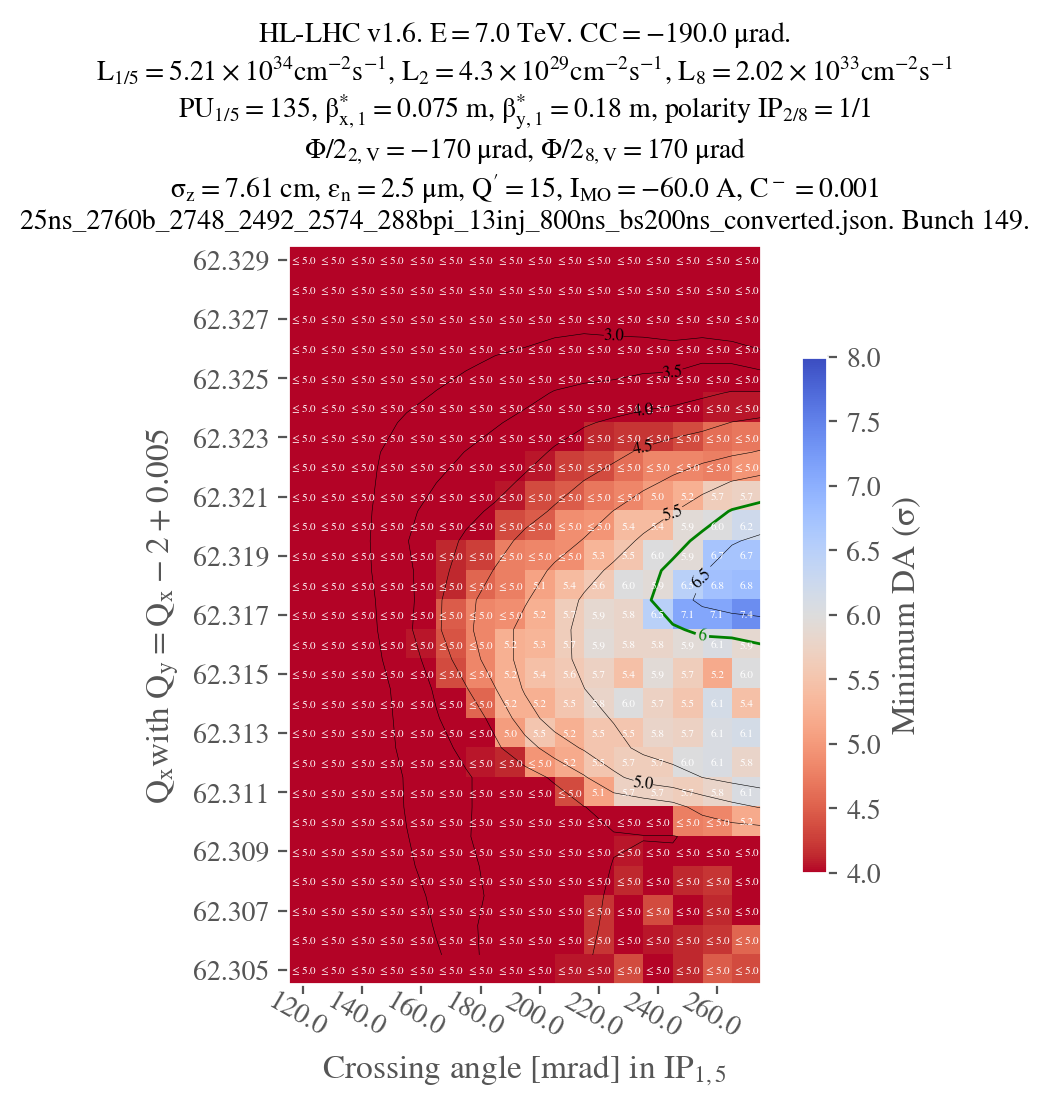

In [10]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.075,
    bety=0.18,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing = False,
    vmin=4.,
    vmax=8.0,
    CC = True,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$",
)
# ! Verified
